<a href="https://colab.research.google.com/github/gsangf10/Analysis_Algorithm/blob/main/Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Decision_Boundary (결정경계분석)


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(10)

li_1 = []
li_2 = []

while True:
  x = np.random.randint(-5,5) * np.random.rand()
  y = np.random.randint(-5,5) * np.random.rand()

  # 반지름이 제곱근 5 이상인 범위와 이내인 범위로 데이더셋 설정
  if x ** 2 + y ** 2 > 5:
    if len(li_1) < 30:
      li_1.append([x,y])
  elif x ** 2 + y ** 2 < 5:
    if len(li_2) < 30:
      li_2.append([x,y])

  if len(li_1) == 30 and len(li_2) == 30:
    break

o_data = np.array(li_1)
i_data = np.array(li_2)

data = np.concatenate((o_data, i_data), axis=0)

target_1 = np.ones((30, 1))
target_2 = np.zeros((30, 1))
target = np.concatenate((target_1, target_2), axis=0)
target = target.reshape(-1)

# 로지스틱 회귀 분석을 이용한 결정경계 예측

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(data, target, random_state=0)

poly = PolynomialFeatures(include_bias=False)
poly.fit(trd, trt)
print(poly.get_feature_names_out())

trd_p = poly.transform(trd)
tsd_p = poly.transform(tsd)

# 로지스틱회귀 학습
lr = LogisticRegression()

lr.fit(trd_p, trt)
print(lr.score(trd_p, trt), lr.score(tsd_p, tst))

# 각 파라미터에 대한 계수(기울기)
coef, intercept = lr.coef_, lr.intercept_
coef, intercept

['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
1.0 1.0


(array([[ 0.3612135 ,  0.09105827,  1.26455516, -0.02777703,  1.40788592]]),
 array([-7.36846803]))

# 시각화

[0. 0. 0. 0. 1.]
[[0.892 0.108]
 [0.826 0.174]
 [0.725 0.275]
 [0.588 0.412]
 [0.428 0.572]]


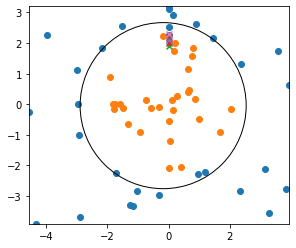

In [ ]:
import matplotlib.pyplot as plt

# 원의 중점 -> x, y의 계수 / 2 * -1
# 원의 반지름 - > 상수값(절대값)의 제곱근

# 원의 중점 구하기
ox = coef[0][0] / 2 * -1
oy = coef[0][1] / 2 * -1

# 반지름 구하기
r = abs(intercept[0])
r = np.sqrt(r)

circle = plt.Circle((ox, oy), r, fill=False)

a = plt.axes(xlim=(np.min(o_data[:,0]), np.max(o_data[:,0])), ylim=(np.min(o_data[:,1]), np.max(o_data[:,1])))
a.add_patch(circle)
a.set_aspect('equal')

plt.scatter(o_data[:,0], o_data[:,1])
plt.scatter(i_data[:,0], i_data[:,1])

test_d = [[0,1.9],[0,2],[0,2.1],[0,2.2],[0,2.3]]
test_p = poly.transform(test_d)

print(lr.predict(test_p))
print(np.round(lr.predict_proba(test_p), decimals=3)) 

for d in test_d:
  plt.scatter(d[0],d[1], marker='x')